In [2]:
# Install Libraries & Roms
# !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
# %pip install -U tf-agents pyvirtualdisplay
!pip install -U gym>=0.21.0
!pip install -U gym[box2d,atari,accept-rom-license]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for box2d-py
Failed to build box2d-py
    Running setup.py install for box2d-py: started
    Running setup.py install for box2d-py: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\cael milne\appdata\local\programs\python\python37\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\CAELMI~1\\AppData\\Local\\Temp\\pip-install-2kwfvwo1\\box2d-py_1d1c897a6c2849cea5e3c15d1b039735\\setup.py'"'"'; __file__='"'"'C:\\Users\\CAELMI~1\\AppData\\Local\\Temp\\pip-install-2kwfvwo1\\box2d-py_1d1c897a6c2849cea5e3c15d1b039735\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\CAELMI~1\AppData\Local\Temp\pip-wheel-vlbcyuu_'
       cwd: C:\Users\CAELMI~1\AppData\Local\Temp\pip-install-2kwfvwo1\box2d-py_1d1c897a6c2849cea5e3c15d1b039735\
  Complete output (16 lines):
  Using setuptools (version 59.4.0).
  running bdist_wheel
  runn

In [2]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Libraries

# Tensor Flow
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common
import numpy as np
import os
import random

# Gym
import gym

# Visualise
# import pyvirtualdisplay

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "./drive/MyDrive/ML/VISUAL"
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

C:\Users\Cael Milne\AppData\Local\Programs\Python\Python37\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


## Task 1.1 Create Environment

In [21]:
env = gym.make("Assault-v4", frameskip=4)
height, width, channels = env.observation_space.shape

# print("Action space: ", env.action_space)
# print("Observation space: ", env.observation_space)

env.reset()
next_obs, reward, done, info = env.step(0)
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

## Task 1.3: Pre-Processing

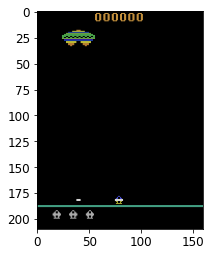

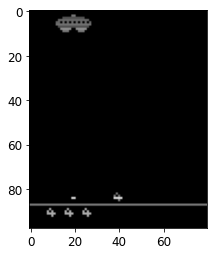

In [5]:
obs = env.reset()

def preprocess_observation(observation):

    # Slice Top Off
    img = observation[14:210:2, ::2]

    # Grey Scale
    img = img.mean(axis=2)
    img = (img - 128).astype(np.int8)

    return img.reshape(98, 80, 1)

plt.imshow(obs)
plt.show()
plt.imshow(preprocess_observation(obs).reshape(98, 80), cmap="gray", vmin=-128, vmax=127)

## Test to attempt getting RAM and Images

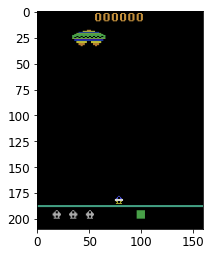

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2  66  83  66
 194 211 194   6 188 255   0  25   0 253   0 253  64  64  64 128  64 128
   0   0   0   0   0   0  22  22  17  17   0 253   0 127 211 196  64  19
  24   0 253   0   0   0   0   0  66 194   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  99  78   0  10   0  14
   0   0 255 248   0   0  64   0 154   0   0   0  15 252  15 252  64 251
   0 245]


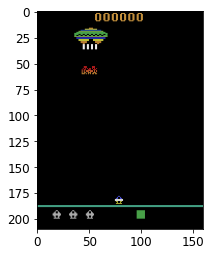

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2 162 179  36
  19  36 180   6 188 255   0  25   0 253   0 253  64  64  64 128  64 128
   0   0 192   0   0   0  12   0  17  23   0 253   0 127 179 164  64  49
  24   0 253   0   0   0   0   0 162  19   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  93  88   0   9   0   0
   0   0 255 248   0   0  64   0 172   0   0   0  15 252 157 251  64 251
   0 245]


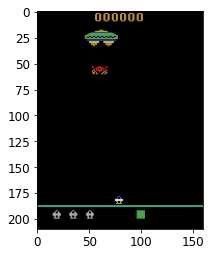

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2 243   4 132
 100 132   5   6 188 255   0  25   0 253   0 253  64  64  64 128  64 128
   0   0 192   0   0   0   2   6  17  25   0 253   0 127   4 245  64  19
  24   0 253   0   0   0   0   0 243 100   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 186  98   0   9   0  10
   0   0 255 248   0   0  64   0 154   0   0   0  15 252  15 252  64 251
   0 245]


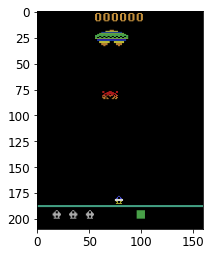

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2  68 213 213
 196  86  86   6 188 255   0  25   0 253   0 253  64  64  64 128 128 128
   0 192   0   0   0   0  24   4  18  26   0 253   0 127  85  70  64  19
  24   0 253   0   0   0   0   0  68 196   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 123 108   0   9   0   4
   0   0 255 248   0   0  64   0 154   0   0   0  15 252  15 252  64 251
   0 245]


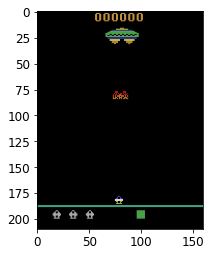

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2 164  38  38
  21 182 182   6 188 255   0  25   0 253   0 253  64  64  64 128 128 128
   0 192   0   0   0   0  14   2  18  27   0 253   0 127 181 166  64  49
  24   0 253   0   0   0   0   0 164  21   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 161 118   0   9   0  14
   0   0 255 248   0   0  64   0 154   0   0   0  15 252  15 252  64 251
   0 245]


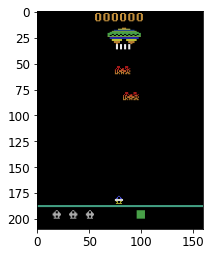

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2 245 134   6
 102   7 150   6 188 255   0  25   0 253   0 253  64  64  64 128 128 128
   0 192 192   0   0   0   4   0  18  23   0 253   0 127 149 134  64  49
  24   0 253   0   0   0   0   0 245 102   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  45 128   0   8   0   0
   0   0 255 248   0   0  64   0 172   0   0   0  15 252 157 251  64 251
   0 245]


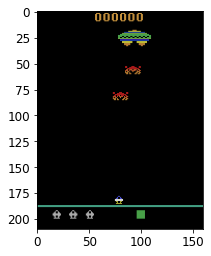

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0 198   0   0   0 253   0   0 192   0 136 252   2  70  38  87
 198 182 231   6 188 255   0  25   0 253   0 253  64 128  64 128  64 128
   0 192 192   0   0   0   0   6  18  25   0 253   0 127 230 215  64  19
  24   0 253   0   0   0   0   0  70 198   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  28 138   0   8   0  10
   0   0 255 248   0   0 128   0 154   0   0   0  15 252  15 252  64 251
   0 245]


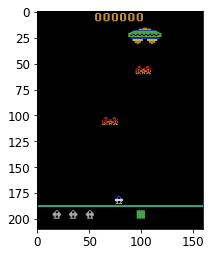

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6  86
 100  86   0 198   0   0   0 253   0   0 192   0 136 252   2 213 213 183
  86  86  56   6 188 255   0  25 160 254 168 254 128 128  64  64  64 128
 192   0 192   0   0   0   0   4  18  26   0 253   0 127  55  40  64  49
  24   0 253   0   0   0   0   0 213  86   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 108 148   0   8   0   4
   0   0 255 248   0   0 128   0 154   0   0   0 248 251  15 252  64 251
   9 245]


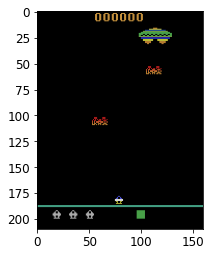

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6   5
 100   5   0 198   0   0   0 253   0   0 192   0 136 252   2 132 132   8
   5   5 152   6 188 255   0  25 160 254 168 254 128 128  64  64  64 128
 192   0 192   0   0   0   0   2  18  27   0 253   0 127 151 136  64  49
  24   0 253   0   0   0   0   0 132   5   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  27 158   0   8   0  14
   0   0 255 248   0   0 128   0 154   0   0   0 248 251  15 252  64 251
   9 245]


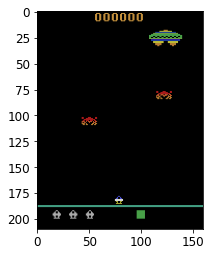

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 180
 100 180   0 198   0   0   0 253   0   0 192   0 136 252   2  36  89  89
 180 233 233   6 188 255   0  25 160 252 168 252 128  64  64  64 128 128
 192 192   0   0   0   0   0  25  18  17   0 253   0 127 232 217  64  19
  24   0 253   0   0   0   0   0  36 180   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  44 168   0   8   0   8
   0   0 255 248   0   0 128   0 154   0   0   0 248 251  15 252  64 251
   9 245]


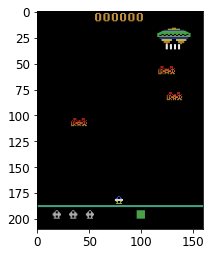

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6  84
 100  84   0 198   0   0   0 253   0   0 192   0 136 252   2 211 185  57
  84  58 185   6 188 255   0  25 160 254 168 254 128  64  64  64 128 128
 192 192 192   0   0   0   0   0  18  20   0 253   0 127  89  74  64  49
  24   0 253   0   0   0   0   0 211  84   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 162 178   0 136   0   2
   0   0 255 248   0   0 128   0 172   0   0   0 248 251 189 251  64 251
   9 245]


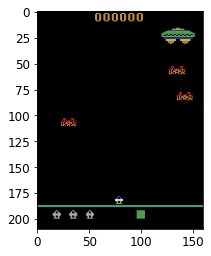

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6   3
 100   3   0 198   0   0   0 253   0   0 192   0 136 252   2 130  10 153
   3 154  10   6 188 255   0  25 160 254 168 254 128  64  64  64 128 128
 192 192 192   0   0   0   0   4  18  24   0 253   0 127  25  10  64  49
  24   0 253   0   0   0   0   0 130   3   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 124 188   0   7   0   4
   0   0 255 248   0   0 128   0 154   0   0   0 248 251  15 252  64 251
   9 245]


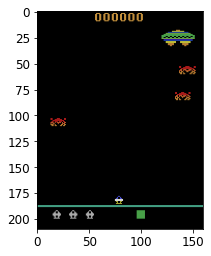

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 178
 100 178   0 198   0   0   0 253   0   0 192   0 136 252   2  34  42 234
 178 186  91   6 188 255   0  25 160 252 168 252 128 128  64  64  64 128
 192 192 192   0   0   0   0   2  18  25   0 253   0 127  25  10 128  19
  24   0 253   0   0   0   0   0  34 178   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 188 198   0   7   0  14
   0   0 255 248   0   0  64   0 154   0   0   0 248 251 248 251  64 251
   9 245]


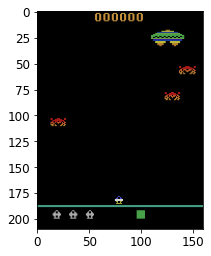

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 178
 100 178   0 198   0   0   0 253   0   0 192   0 136 252   2  34 217 234
 178  90  91   6 188 255   0  25 160 252 168 252  64 128 128  64  64 128
 192 192 192   0   0   0   0   0  18  26   0 253   0 127 200 185 128  19
  24   0 253   0   0   0   0   0  34 178   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4  97 208   0   7   0   8
   0   0 255 248   0   0  64   0 154   0   0   0  15 252 248 251  64 251
   9 245]


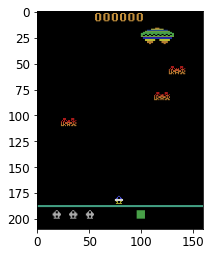

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6   3
 100   3   0 198   0   0   0 253   0   0 192   0 136 252   2 130 136 153
   3   9  10   6 188 255   0  25 160 254 168 254  64 128 128  64  64 128
 192 192 192   0   0   0   0  31  18  17   0 253   0 127 104  89 128  49
  24   0 253   0   0   0   0   0 130   3   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 105 218   0   7   0   2
   0   0 255 248   0   0  64   0 154   0   0   0  15 252 248 251  64 251
   9 245]


In [22]:
numSteps = 15
env.reset()
for i in range(numSteps):
    next_obs, reward, done, info = env.step(0)
    plt.imshow(next_obs)
    plt.show()
    ram = env.ale.getRAM()
    print(ram)